<a href="https://colab.research.google.com/github/mavetera/Cardio-Vascular-Disease-Project/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
#Load the Data
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart (1).csv


In [ ]:
#Storing the data into variable
df = pd.read_csv('heart.csv')

#Show the first 7 rows of data through print
df.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [ ]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc84b3816d0>,
      dtype=object)

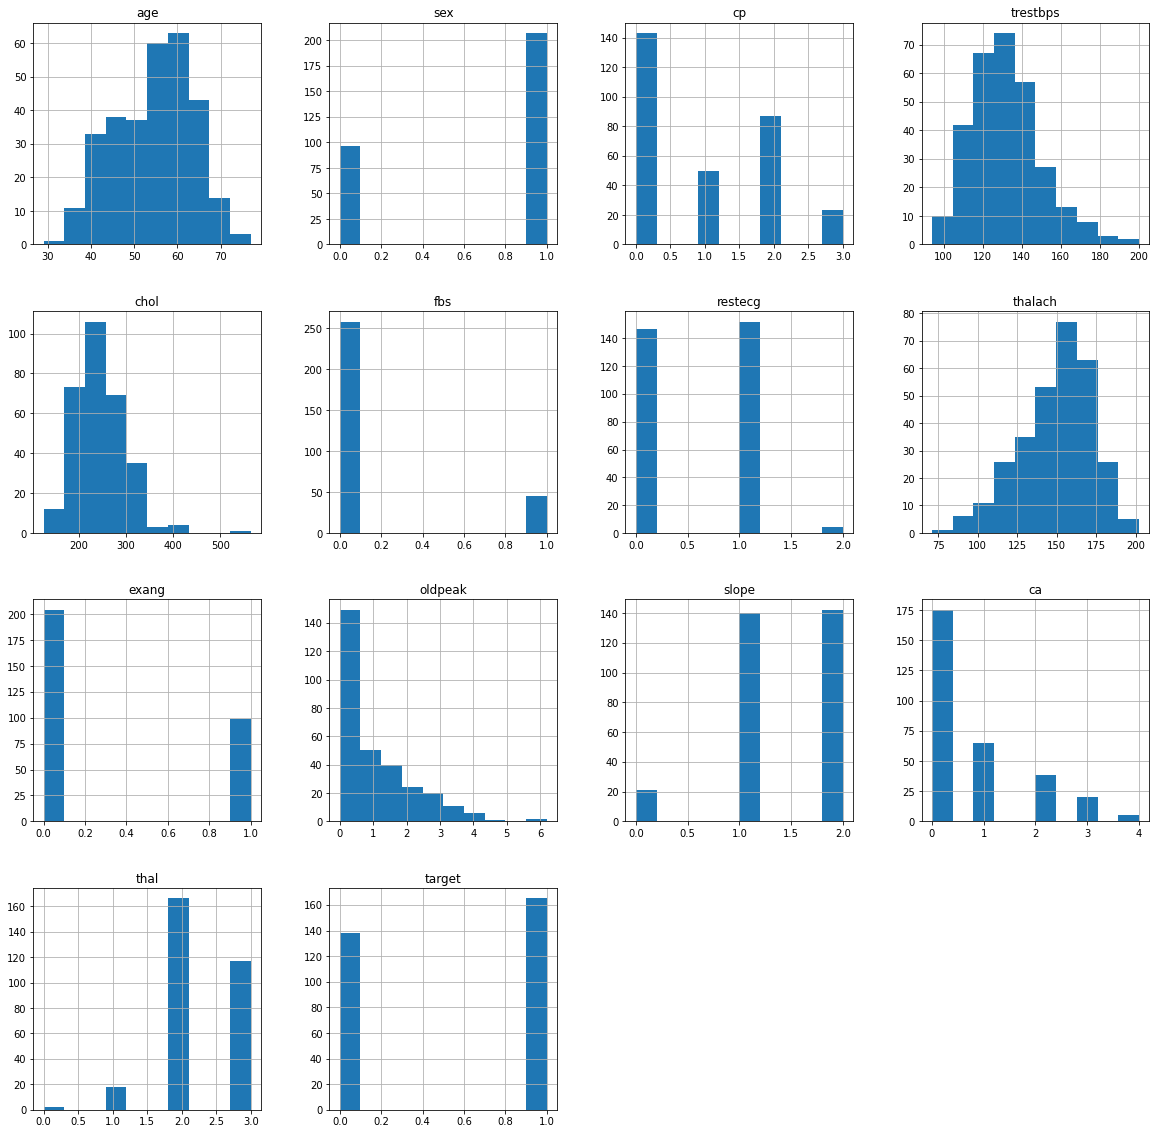

In [ ]:
plt.rcParams[ 'figure.figsize'] = (20,20)
df.hist()

In [ ]:
y = df['target']
df.drop('target', axis=1,inplace=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
labelEncoder = LabelEncoder()
df['oldpeak'] = labelEncoder.fit_transform(y=df['oldpeak'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=17)

In [ ]:
tree = DecisionTreeClassifier(random_state=17, max_depth=3, min_samples_leaf=2)
tree.fit(X=X_train, y=y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=17)

In [ ]:
tree.score(X_test, y_test)

0.7582417582417582

In [ ]:
preds = tree.predict(X_test)
accuracy_score(y_true=y_test, y_pred=preds)

0.7582417582417582

In [ ]:
export_graphviz(tree, 'tree1.dot', filled=True, feature_names=X_train.columns, rounded=True)
!dot -Tpng 'tree1.dot' -o  'tree1.png'

In [ ]:
!ls

'heart (1).csv'   heart.csv   sample_data   tree1.dot   tree1.png


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [ ]:
# Let's vary hyperparameters from 2 - 10
best_parameters = {'max_depth': np.arange(2,11), 'min_samples_leaf': np.arange(2,11)}
decision_tree = DecisionTreeClassifier(criterion='entropy') # for information gain and entropy
model = GridSearchCV(estimator=decision_tree, param_grid=best_parameters, n_jobs=-1, verbose=1, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=17))
model.fit(X_train, y_train)
model.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'max_depth': 9, 'min_samples_leaf': 3}

In [ ]:
model.best_score_

0.7688128772635814

In [ ]:
preds_2 = model.predict(X_test)

In [ ]:
accuracy_score(y_test, preds_2)

0.7802197802197802

In [ ]:
export_graphviz(model.best_estimator_, out_file='tree2.dot', filled=True, feature_names=X_train.columns, rounded=True)

In [ ]:
!dot -Tpng 'tree2.dot' -o 'tree2.png'

In [ ]:
auc=roc_auc_score(y_test, preds_2)
auc

0.7819767441860466

In [ ]:
fpr,tpr,thresholds= roc_curve(y_test, preds_2)

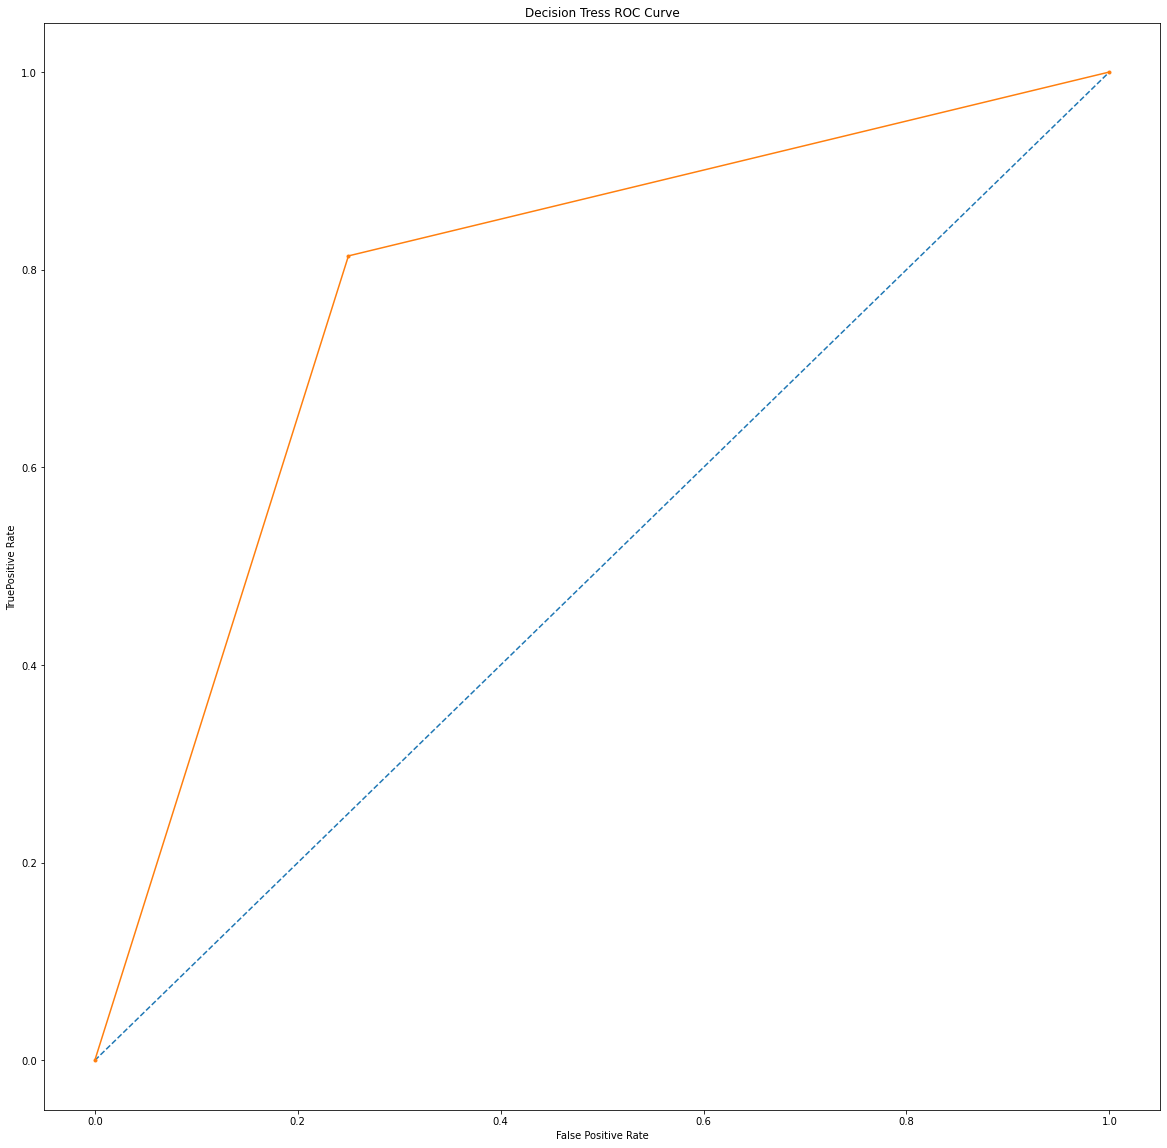

In [ ]:
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker=".")

plt.xlabel("False Positive Rate")
plt.ylabel("TruePositive Rate")
plt.title("Decision Tress ROC Curve")
plt.show()